### Survey Flow

![Survey Flow Diagram](surveyflow.png "Survey Flow")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
newest_survey_csv = './Dataset/' + 'LKF Medical (Axe Brand) Survey Form_February 28, 2024_21.52' + '.csv'
raw_df = pd.read_csv(newest_survey_csv)
raw_df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q70#1_7,Q71#1_1,Q71#1_2,Q71#1_3,Q71#1_4,Q71#1_5,Q71#1_6,Q71#1_7,Q72,Q73
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Kindly rank your top 3 most used social media ...,Kindly rank your top 3 most trusted social med...,Kindly rank your top 3 most trusted social med...,Kindly rank your top 3 most trusted social med...,Kindly rank your top 3 most trusted social med...,Kindly rank your top 3 most trusted social med...,Kindly rank your top 3 most trusted social med...,Kindly rank your top 3 most trusted social med...,Please share with us any comments/thoughts tha...,Please indicate your email address below for u...
1,"{""ImportId"":""startDate"",""timeZone"":""Asia/Irkut...","{""ImportId"":""endDate"",""timeZone"":""Asia/Irkutsk""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Asia/Ir...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID89#1_7""}","{""ImportId"":""QID90#1_1""}","{""ImportId"":""QID90#1_2""}","{""ImportId"":""QID90#1_3""}","{""ImportId"":""QID90#1_4""}","{""ImportId"":""QID90#1_5""}","{""ImportId"":""QID90#1_6""}","{""ImportId"":""QID90#1_7""}","{""ImportId"":""QID81_TEXT""}","{""ImportId"":""QID91_TEXT""}"
2,2024-02-15 15:27:20,2024-02-15 15:31:15,Survey Preview,NaN,100,234,True,2024-02-15 15:31:16,R_4Csxtb8TbDsS3lF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-15 18:23:40,2024-02-15 18:25:49,IP Address,116.14.100.10,100,129,True,2024-02-15 18:25:50,R_4n105depNGI2e49,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-20 13:52:25,2024-02-20 14:04:12,Survey Preview,NaN,100,707,True,2024-02-20 14:04:14,R_4P7Z8WVBImgiRY6,NaN,...,NaN,NaN,Rank 1,NaN,Rank 2,Rank 3,NaN,NaN,v,NaN


In [4]:
survey_df = raw_df.filter(regex='^Q\d')
survey_df = survey_df.drop(index = [0,1,2])
survey_df.reset_index(drop=True, inplace=True)
survey_df.head()

,Q2,Q2_3_TEXT,Q3,Q3_5_TEXT,Q4_1,Q5,Q5_6_TEXT,Q6,Q6_6_TEXT,Q7,...,Q70#1_7,Q71#1_1,Q71#1_2,Q71#1_3,Q71#1_4,Q71#1_5,Q71#1_6,Q71#1_7,Q72,Q73
0,Prefer Not to Say,NaN,Eurasian,NaN,23,Part-time,NaN,Diploma,NaN,"Tiger Balm,Eagle Brand",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,NaN,Eurasian,NaN,27,Part-time,NaN,'A' Levels,NaN,Tiger Balm,...,NaN,NaN,Rank 1,NaN,Rank 2,Rank 3,NaN,NaN,v,NaN
2,Female,NaN,Chinese,NaN,24,Part-time,NaN,Bachelor's Degree,NaN,"Tiger Balm,Three Star Brand",...,NaN,Rank 1,NaN,NaN,Rank 2,NaN,Rank 3,NaN,NIL,NaN
3,Male,NaN,Chinese,NaN,25,Student / Undergraduate / Polytechnic,NaN,Bachelor's Degree,NaN,"Tiger Balm,Yu Yee Oil",...,NaN,Rank 1,NaN,NaN,Rank 3,NaN,Rank 2,NaN,nil,NaN
4,Male,NaN,Chinese,NaN,23,Student / Undergraduate / Polytechnic,NaN,Bachelor's Degree,NaN,Tiger Balm,...,NaN,Rank 1,NaN,NaN,Rank 3,NaN,Rank 2,NaN,nil,NaN


### General Insights

In [5]:
def survey_group(start_col, end_col): 
    res = survey_df.loc[:, start_col:end_col]
    return res

In [6]:
general_df = survey_group('Q2','Q6_6_TEXT')
general_df.head()

# Gender 

,Q2,Q2_3_TEXT,Q3,Q3_5_TEXT,Q4_1,Q5,Q5_6_TEXT,Q6,Q6_6_TEXT
0,Prefer Not to Say,NaN,Eurasian,NaN,23,Part-time,NaN,Diploma,NaN
1,Male,NaN,Eurasian,NaN,27,Part-time,NaN,'A' Levels,NaN
2,Female,NaN,Chinese,NaN,24,Part-time,NaN,Bachelor's Degree,NaN
3,Male,NaN,Chinese,NaN,25,Student / Undergraduate / Polytechnic,NaN,Bachelor's Degree,NaN
4,Male,NaN,Chinese,NaN,23,Student / Undergraduate / Polytechnic,NaN,Bachelor's Degree,NaN


In [7]:
def combine_others(df, col_1, col_2):
    res = df.iloc[1:,:].apply(lambda row: row[col_2] if row[col_1] == 'Others' and pd.notna(row[col_2]) else row[col_1], axis=1)
    return res

general_df_cleaned = pd.DataFrame()

general_df_cleaned['Gender'] = combine_others(general_df, 'Q2', 'Q2_3_TEXT')
general_df_cleaned['Race'] = combine_others(general_df, 'Q3','Q3_5_TEXT')
general_df_cleaned['Age'] = general_df.loc[1:,'Q4_1']
general_df_cleaned['Employment_Status'] = combine_others(general_df, 'Q5','Q5_6_TEXT')
general_df_cleaned['Highest Education'] = combine_others(general_df, 'Q6','Q6_6_TEXT')


In [8]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px

# Sample DataFrame
data = {
    'Gender': ['Male', 'Prefer Not to Say', 'Male', 'Female', 'Male'],
    'Race': [None, 'Eurasian', 'Eurasian', 'Chinese', 'Chinese'],
    'Age': [25, 23, 27, 24, 25],
    'Employment_Status': ['Student / Undergraduate / Polytechnic', 'Part-time', 'Part-time', 'Part-time', 'Student / Undergraduate / Polytechnic'],
    'Highest Education': ["Bachelor's Degree", 'Diploma', "'A' Levels", "Bachelor's Degree", "Bachelor's Degree"]
}

df = pd.DataFrame(data)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the number of rows and columns in the layout
num_rows = 2
num_cols = 3

# Define the layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='Simple Dashboard'),

    # Create a grid layout for plots using a for loop
    html.Div([
        html.Div([
            dcc.Graph(id=f'bar-{column.lower()}', figure=px.bar(df, x=column, title=column))
        ], className='six columns')  # Each plot takes six columns
        for column in df.columns if df[column].dtype == 'object'
    ], className='row')  # Each row contains the specified number of columns
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightblue']
n_rows = len(general_df_cleaned.columns)
n_cols = 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 5 * n_rows))

for i, column in enumerate(general_df_cleaned.columns):
    ax = axes[i] if n_rows > 1 else axes
    general_df_cleaned[column].value_counts().sort_index().plot(kind='bar', color=colors[i], ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Bar Chart for {column}')

    # Add numeric values on top of each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.tight_layout()
plt.show()

### Filter Questions

In [14]:
filter_df = survey_df.loc[:, 'Q7':'Q9']

filter_clean_df = pd.DataFrame()
filter_clean_df['MO_Heard'] = filter_df['Q7'].str.split(',')
filter_clean_df['MO_Used'] = filter_df['Q8'].str.split(',')
filter_clean_df['Used_Using_MO'] = filter_df['Q9'].map({'Yes':True, 'No':False})

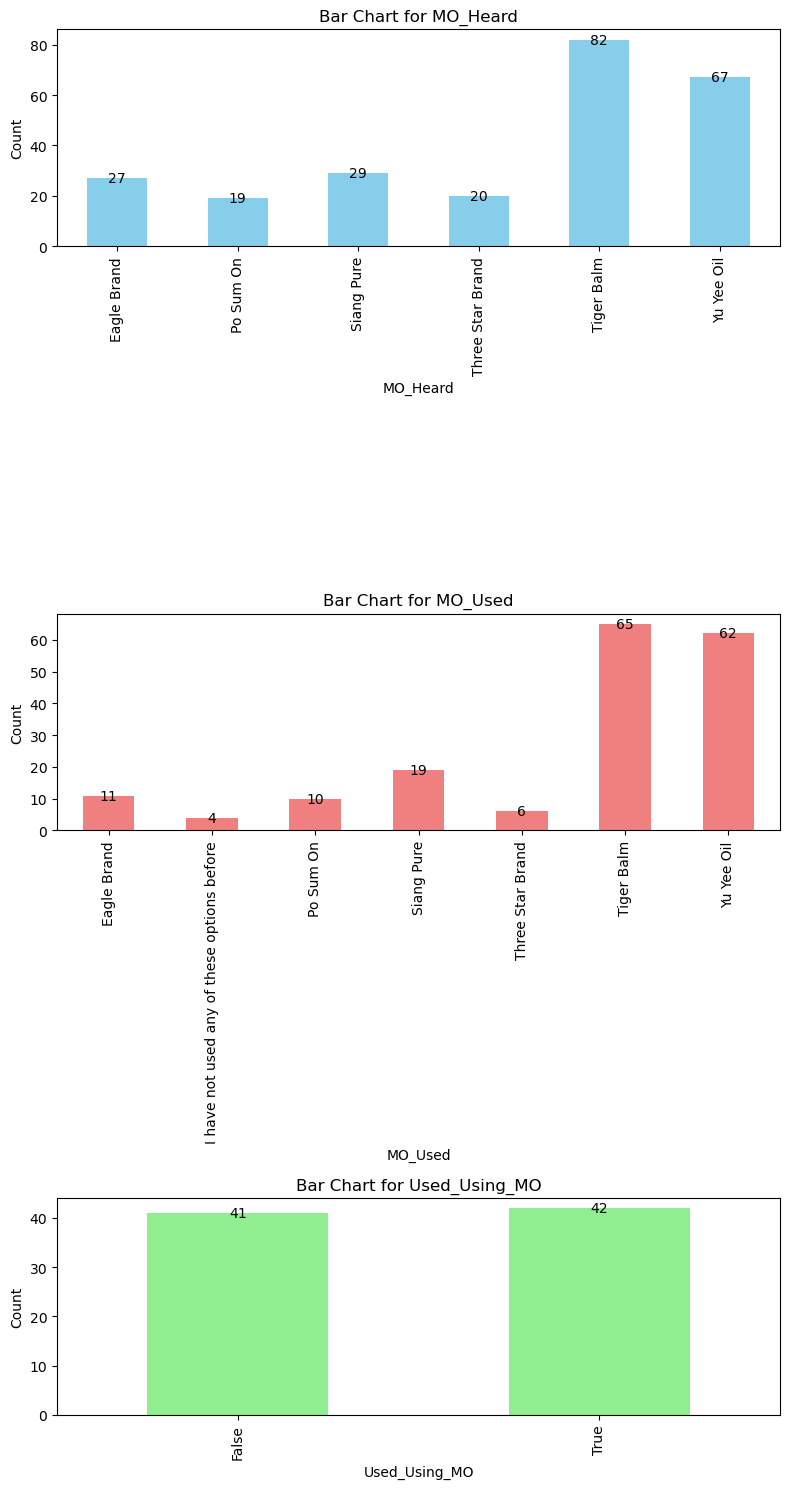

In [13]:
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightblue']
n_rows = len(filter_clean_df.columns)
n_cols = 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 5 * n_rows))

for i, column in enumerate(filter_clean_df.columns):
    ax = axes[i] if n_rows > 1 else axes
    if filter_clean_df[column].apply(lambda x: isinstance(x, list) if x is not None else False).any():
        filter_clean_df_exploded = filter_clean_df.explode(column)
        filter_clean_df_exploded[column].value_counts().sort_index().plot(kind='bar', color=colors[i], ax=ax)
    else:
        filter_clean_df[column].value_counts().sort_index().plot(kind='bar', color=colors[i], ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Bar Chart for {column}')

    # Add numeric values on top of each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.tight_layout()
plt.show()

### Axe Brand filter questions

In [ ]:
axe_filter_df = survey_df.loc[:, 'Q10':'Q12']

axe_filter_clean_df = pd.DataFrame()

axe_filter_clean_df['Axe_MO_Heard'] = filter_df['Q10'].map({'Yes':True, 'No':False})
axe_filter_clean_df['Axe_Heard_Source'] = combine_others(axe_filter_df, 'Q11', 'Q11_7_TEXT')
axe_filter_clean_df['MO_Used'] = filter_df['Q8'].str.split(',')
axe_filter_clean_df['Used_Using_MO'] = filter_df['Q9'].map({'Yes':True, 'No':False})

In [ ]:
prelim_ques = ['Q2','Q8']

group_6_filter = ['Q9']
group_6_tech = ['Q56','Q62']

group_5_filter = ['Q10']
group_5_tech = ['Q49','Q55']

ab_aware_tech = 'Q11' # tech ques for group 1 - 4

group_4_filter = 'Q12'
group_4_tech = ['Q41','Q48']

ab_user_tech = ['Q13','Q18_7_TEXT'] # tech ques for group 1 - 3

group_123_filter = 'Q19'

group_1_tech = ['Q20','Q25']
group_2_tech = ['Q26','Q32'] # does not have fgd or interviews
group_3_tech = ['Q33','Q40']

marketing_tech = ['Q63','Q73']


### For FGD/Interviews

#### **FGDs**
- Group 1 - Q25
- Group 3 - Q40
- Group 6 - Q62

#### **Interviews**
- Group 4 - Q48
- Group 5 - Q55

#### *Prize Giving* ####
- Q73

In [ ]:
temp = ['Q25','Q40','Q62','Q48','Q55','Q73']


In [29]:
import pygsheets
import pandas as pd
#authorization
gc = pygsheets.authorize(service_file="C:/Users/josep/Desktop/NUS Biz/Y4S2/FSP/Survey/fsp4002-f35733441e3c.json")

# Create empty dataframe
df = pd.DataFrame()

# Create a column
df['name'] = ['John', 'Steve', 'Sarah','Joseph']

#open the google spreadsheet (where 'PY to Gsheet Test' is the name of my sheet)
sh = gc.open('FGDs/Interviews/Prize')

#select the first sheet 
wks = sh[0]

#update the first sheet with df, starting at cell B2. 
wks.clear()
wks.set_dataframe(df,(1,2))